In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# set pandas to display all columns
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('new_222_data_train_decorr_imputed_transformed.csv')
df_test = pd.read_csv('new_222_data_test_decorr_imputed_transformed.csv')
print(df.shape)
df.sample(3)

(2507, 76)


,Average Workers_Compensation_Costs_(per $100 of payroll),Debt_Service_as_a_Share_of_Tax_Revenue,Estate_Inheritance_Tax_Levied_Flag,GPT_OH_Government_Support,GPT_OH_Large_Customer_Base,GPT_OH_Limited_Financing,GPT_OH_Limited_Tech_n_Infra,GPT_OH_Low_Cost_of_Living,GPT_OH_Low_Pop_Bad_Weather,GPT_OH_Natural_Resources,GPT_OH_Supportive_Community,GPT_OH_Tough_Labor_Market,GPT_OH_Unfavorable_Location,GPT_OH_Various_Downsides,GPT_PCA_dim0,GPT_PCA_dim1,GPT_PCA_dim2,GPT_PCA_dim3,GPT_PCA_dim4,GPT_PCA_dim5,GPT_PCA_dim6,GPT_PCA_dim7,GPT_PCA_dim8,GPT_PCA_dim9,Prev_Yr_Agri_Pct_GDP_log,Prev_Yr_EduS_Pct_GDP_log,Prev_Yr_EntS_Pct_GDP_log,Prev_Yr_FinS_Pct_GDP_log,Prev_Yr_GoTr_Pct_GDP_log,Prev_Yr_Gvmt_Pct_GDP_log,Prev_Yr_Info_Pct_GDP_log,Prev_Yr_Manu_Pct_GDP_log,Prev_Yr_Mine_Pct_GDP_log,Prev_Yr_Retl_Pct_GDP_log,"Property_Tax_Burden_(per $1,000 of personal income)","Public_Employees_Per_10,000_of_Population_(full-time equivalent)",Recently_Legislated_Tax_Changes,"Remaining_Tax_Burden(per $1,000 of personal income)","Sales_Tax_Burden(per $1,000 of personal income)","State_Liability_System_Survey_(tort litigation treatment, judicial impartiality, etc.)",State_Minimum_Wage_(federal floor is $7.25),Tax_Expenditure_Limits,Top_Marginal_Personal_Income_Tax_Rate,coastline_flag,gpt_ae_pca_0,gpt_ae_pca_1,gpt_ae_pca_2,health_social_pca_0,health_social_pca_1,health_social_pca_2,health_social_pca_3,health_social_pca_4,health_social_pca_5,pop_10yr_pct_chg,prev_year_access_to_exercise_opportunities,prev_year_adult_obesity,prev_year_air_pollution_particulate_matter,prev_year_alcohol_impaired_driving_deaths,prev_year_dentists_log,prev_year_diabetes_monitoring,prev_year_drinking_water_violations,prev_year_driving_alone_to_work,prev_year_flu_vaccinations,prev_year_injury_deaths_log,prev_year_long_commute_driving_alone,prev_year_mental_health_providers_log,prev_year_preventable_hospital_stays_log,prev_year_primary_care_physicians_log,prev_year_severe_housing_problems_log,prev_year_social_associations,prev_year_uninsured,prev_year_violent_crime_log,prev_yr_rent_50_2_log,two_yrs_prior_pct_it_workers_log,population_2020_log,microbusiness_density
270,1.64,0.06,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.705102,0.33844,-0.054578,0.187498,0.153504,-0.030644,-0.274737,0.004247,-0.043514,-0.240056,2.517696,1.673351,0.000000,2.925310,0.000000,3.019937,0.593327,0.000000,0.000000,2.089392,27.04,491.9,-0.66,12.39,20.47,66.1,7.25,0.0,0.06,0.0,-2.371261,-1.268980,-0.531317,4.330896,0.783542,-0.123385,-0.340863,-0.948261,-0.003876,-1.983920,0.49,0.35,9.3,0.08,8.455531,0.88,0.0,0.91,0.41,4.532599,0.32,8.457655,8.717846,8.049108,0.104360,5.3,0.15,5.556828,6.475433,0.741937,9.147188,0.803088
1308,1.31,0.05,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,-0.607308,-0.60479,0.130816,0.256532,-0.128933,-0.319357,-0.217435,0.365845,0.275432,-0.152849,0.672944,2.621039,1.470176,2.736314,0.815365,2.940220,0.625938,3.332562,0.254642,1.978239,22.46,530.0,-2.38,15.86,24.18,70.9,7.25,1.0,0.05,0.0,-2.570442,-2.071209,-0.008083,1.627656,-0.153061,-0.653301,0.202026,-0.526053,0.591571,-0.164519,0.66,0.36,9.8,0.21,7.701200,0.88,0.0,0.86,0.54,4.595120,0.26,5.860786,8.105609,7.462215,0.131028,14.6,0.14,5.192957,6.568078,0.641854,11.412210,2.183096
945,0.72,0.04,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.376769,-0.39771,0.919380,0.124851,0.007915,0.637950,0.410947,-0.335241,0.006191,-0.134706,2.063058,1.768150,1.128171,2.502255,2.438863,2.806386,0.741937,3.059176,1.289233,2.278292,17.82,563.1,-0.94,15.79,36.25,69.5,11.00,1.0,0.06,0.0,-0.497001,-1.707649,1.063236,3.476746,-0.878215,-0.237658,-0.081589,0.058205,-0.696981,-1.323262,0.66,0.42,9.1,0.16,8.684570,0.89,0.0,0.83,0.48,4.499810,0.44,9.782506,8.278428,8.177797,0.139762,10.7,0.10,6.059123,6.514713,0.530628,9.792444,1.207613


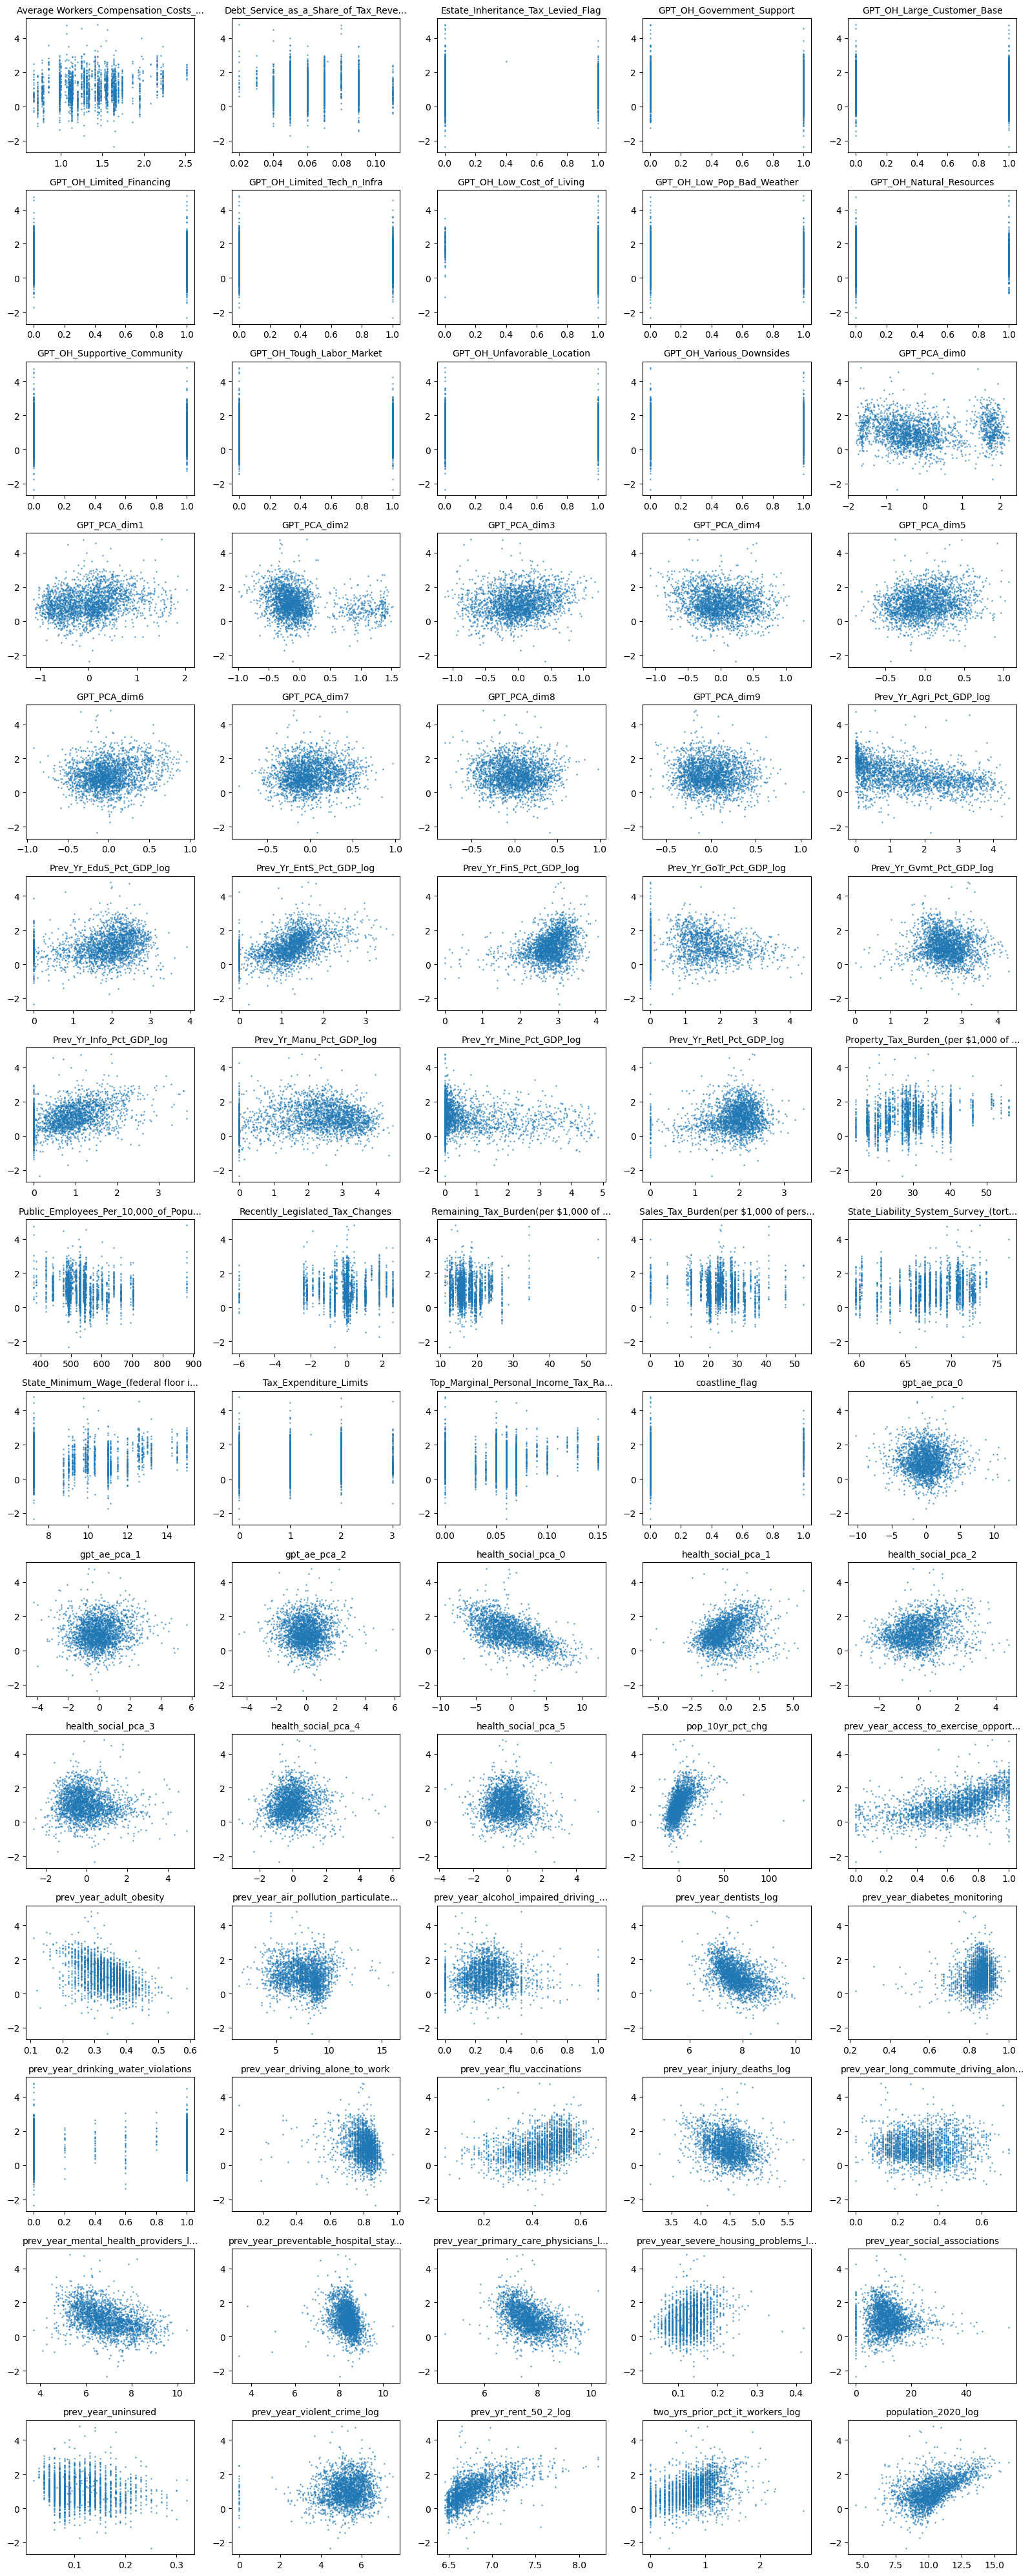

In [3]:

# sub plots 5*15 (75) covariates
i = 0
fig, axes = plt.subplots(15, 5, figsize=(16, 40))
for col in df.columns.to_list():
    if col != 'microbusiness_density':
        # plot the scatter plot
        axes[i//5, i%5].scatter(df[col], np.log(df['microbusiness_density']), s=1, alpha=0.5)
        col_name = col[:35] + '...' if len(col) > 35 else col
        axes[i//5, i%5].set_title(col_name, fontsize=10)
        i += 1
plt.tight_layout()
plt.show()

In [4]:
ols_result = ['prev_yr_rent_50_2_log', 'health_social_pca_0', 'Prev_Yr_EntS_Pct_GDP_log', 'population_2020_log', 
          'prev_year_adult_obesity', 'prev_year_primary_care_physicians_log', 'prev_year_uninsured', 
          'health_social_pca_5', 'Prev_Yr_FinS_Pct_GDP_log', 'pop_10yr_pct_chg', 'prev_year_injury_deaths_log', 
          'health_social_pca_1', 'prev_year_access_to_exercise_opportunities', 'Prev_Yr_Gvmt_Pct_GDP_log', 
          'GPT_OH_Natural_Resources', 'Recently_Legislated_Tax_Changes', 'prev_year_dentists_log', 
          'prev_year_severe_housing_problems_log', 'Prev_Yr_Manu_Pct_GDP_log', 'health_social_pca_3', 
          'Property_Tax_Burden_(per $1,000 of personal income)', 'Prev_Yr_Agri_Pct_GDP_log', 
          'Remaining_Tax_Burden(per $1,000 of personal income)', 'Tax_Expenditure_Limits', 
          'two_yrs_prior_pct_it_workers_log', 'prev_year_alcohol_impaired_driving_deaths', 
          'Prev_Yr_GoTr_Pct_GDP_log', 'GPT_OH_Low_Pop_Bad_Weather']
ols_result_sorted = sorted(ols_result)
print(len(ols_result))

28


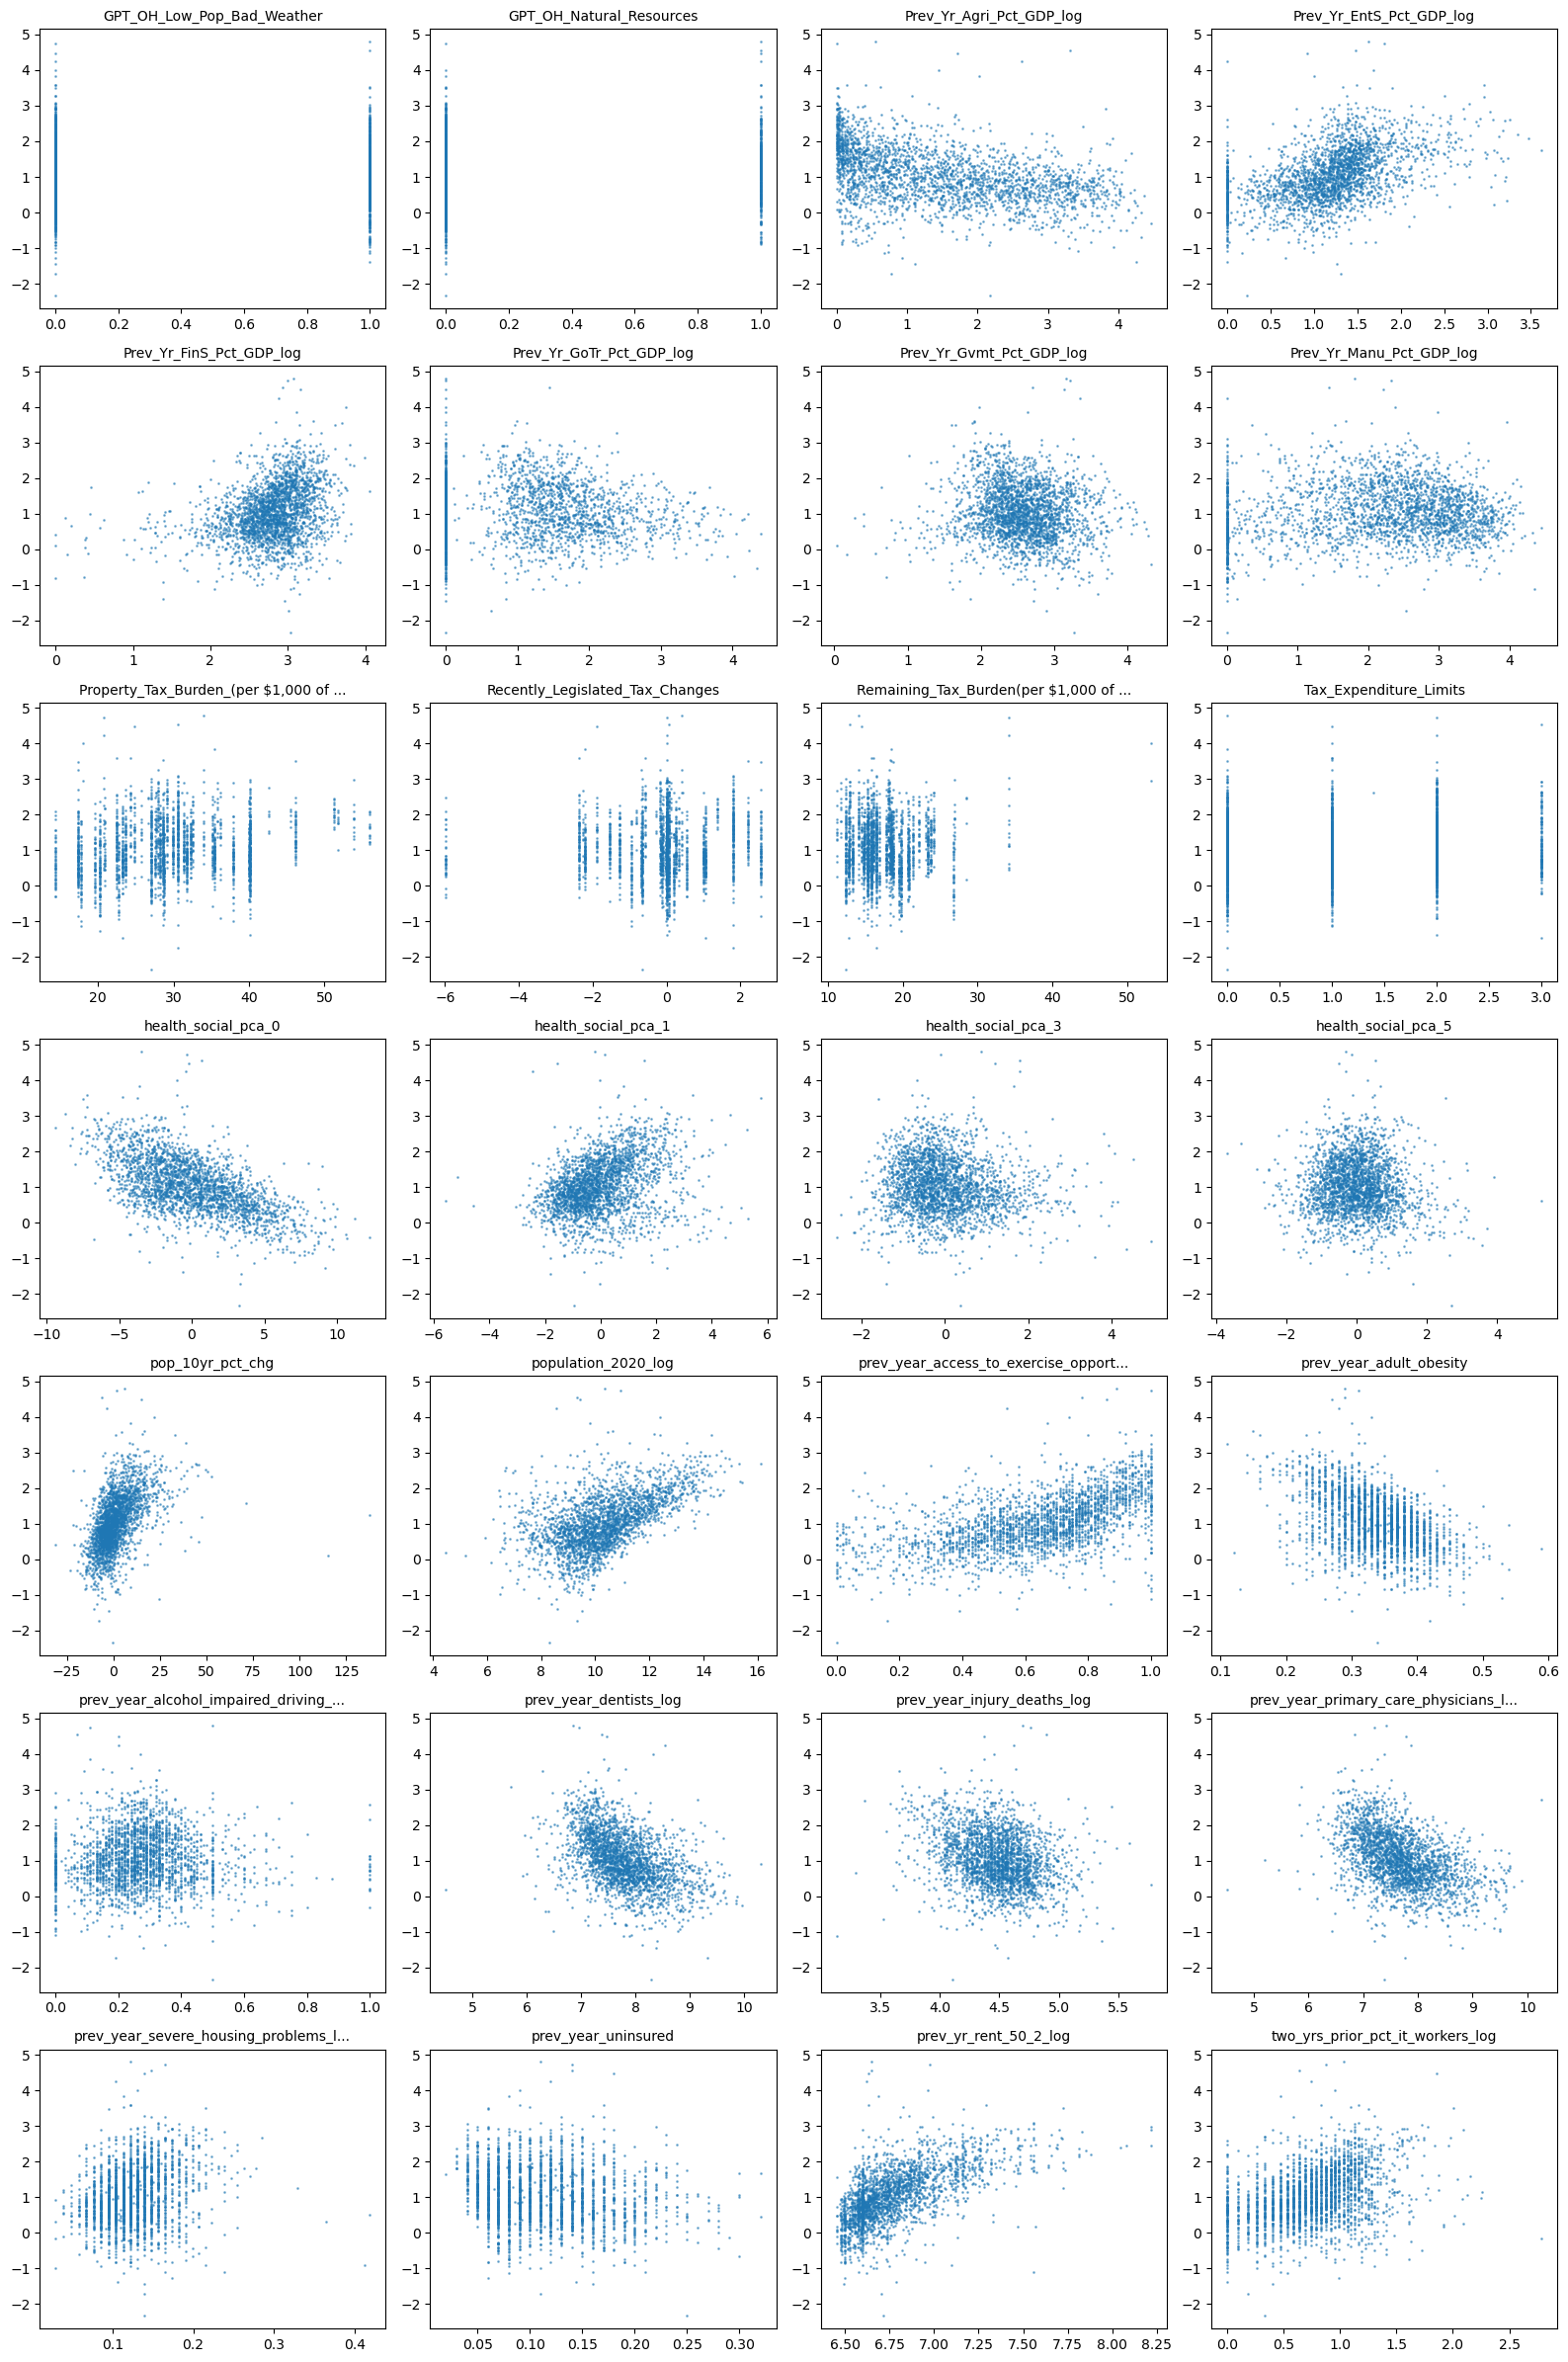

In [5]:
i = 0
fig, axes = plt.subplots(7, 4, figsize=(16, 24))
for col in ols_result_sorted:
    if col != 'microbusiness_density':
        # plot the scatter plot
        axes[i//4, i%4].scatter(df[col], np.log(df['microbusiness_density']), s=1, alpha=0.5)
        col_name = col[:35] + '...' if len(col) > 35 else col
        axes[i//4, i%4].set_title(col_name, fontsize=10)
        i += 1
plt.tight_layout()
plt.show()

In [6]:
logit_result = result = ['prev_yr_rent_50_2_log', 'prev_year_adult_obesity', 'Prev_Yr_Info_Pct_GDP_log', 'pop_10yr_pct_chg', 
          'Property_Tax_Burden_(per $1,000 of personal income)', 'health_social_pca_0', 'prev_year_uninsured', 
          'prev_year_long_commute_driving_alone', 'Prev_Yr_Mine_Pct_GDP_log', 'gpt_ae_pca_2', 'prev_year_social_associations', 
          'GPT_PCA_dim8', 'GPT_PCA_dim1', 'GPT_PCA_dim5', 'GPT_OH_Large_Customer_Base', 'GPT_OH_Limited_Financing', 'GPT_PCA_dim2', 
          'Prev_Yr_Gvmt_Pct_GDP_log', 'Public_Employees_Per_10,000_of_Population_(full-time equivalent)', 
          'State_Liability_System_Survey_(tort litigation treatment, judicial impartiality, etc.)', 'Prev_Yr_FinS_Pct_GDP_log', 
          'health_social_pca_3', 'prev_year_mental_health_providers_log', 'Remaining_Tax_Burden(per $1,000 of personal income)', 
          'GPT_PCA_dim4', 'Prev_Yr_GoTr_Pct_GDP_log', 'health_social_pca_4', 'prev_year_severe_housing_problems_log', 'GPT_PCA_dim0', 
          'GPT_OH_Low_Pop_Bad_Weather', 'GPT_OH_Limited_Tech_n_Infra', 'GPT_PCA_dim3', 'health_social_pca_2', 
          'prev_year_violent_crime_log', 'coastline_flag', 'prev_year_diabetes_monitoring', 'GPT_OH_Unfavorable_Location', 
          'Prev_Yr_EntS_Pct_GDP_log', 'two_yrs_prior_pct_it_workers_log', 'Prev_Yr_EduS_Pct_GDP_log', 'Tax_Expenditure_Limits', 
          'prev_year_dentists_log', 'GPT_PCA_dim7']
logit_result_sorted = sorted(logit_result)
print(len(logit_result))

43


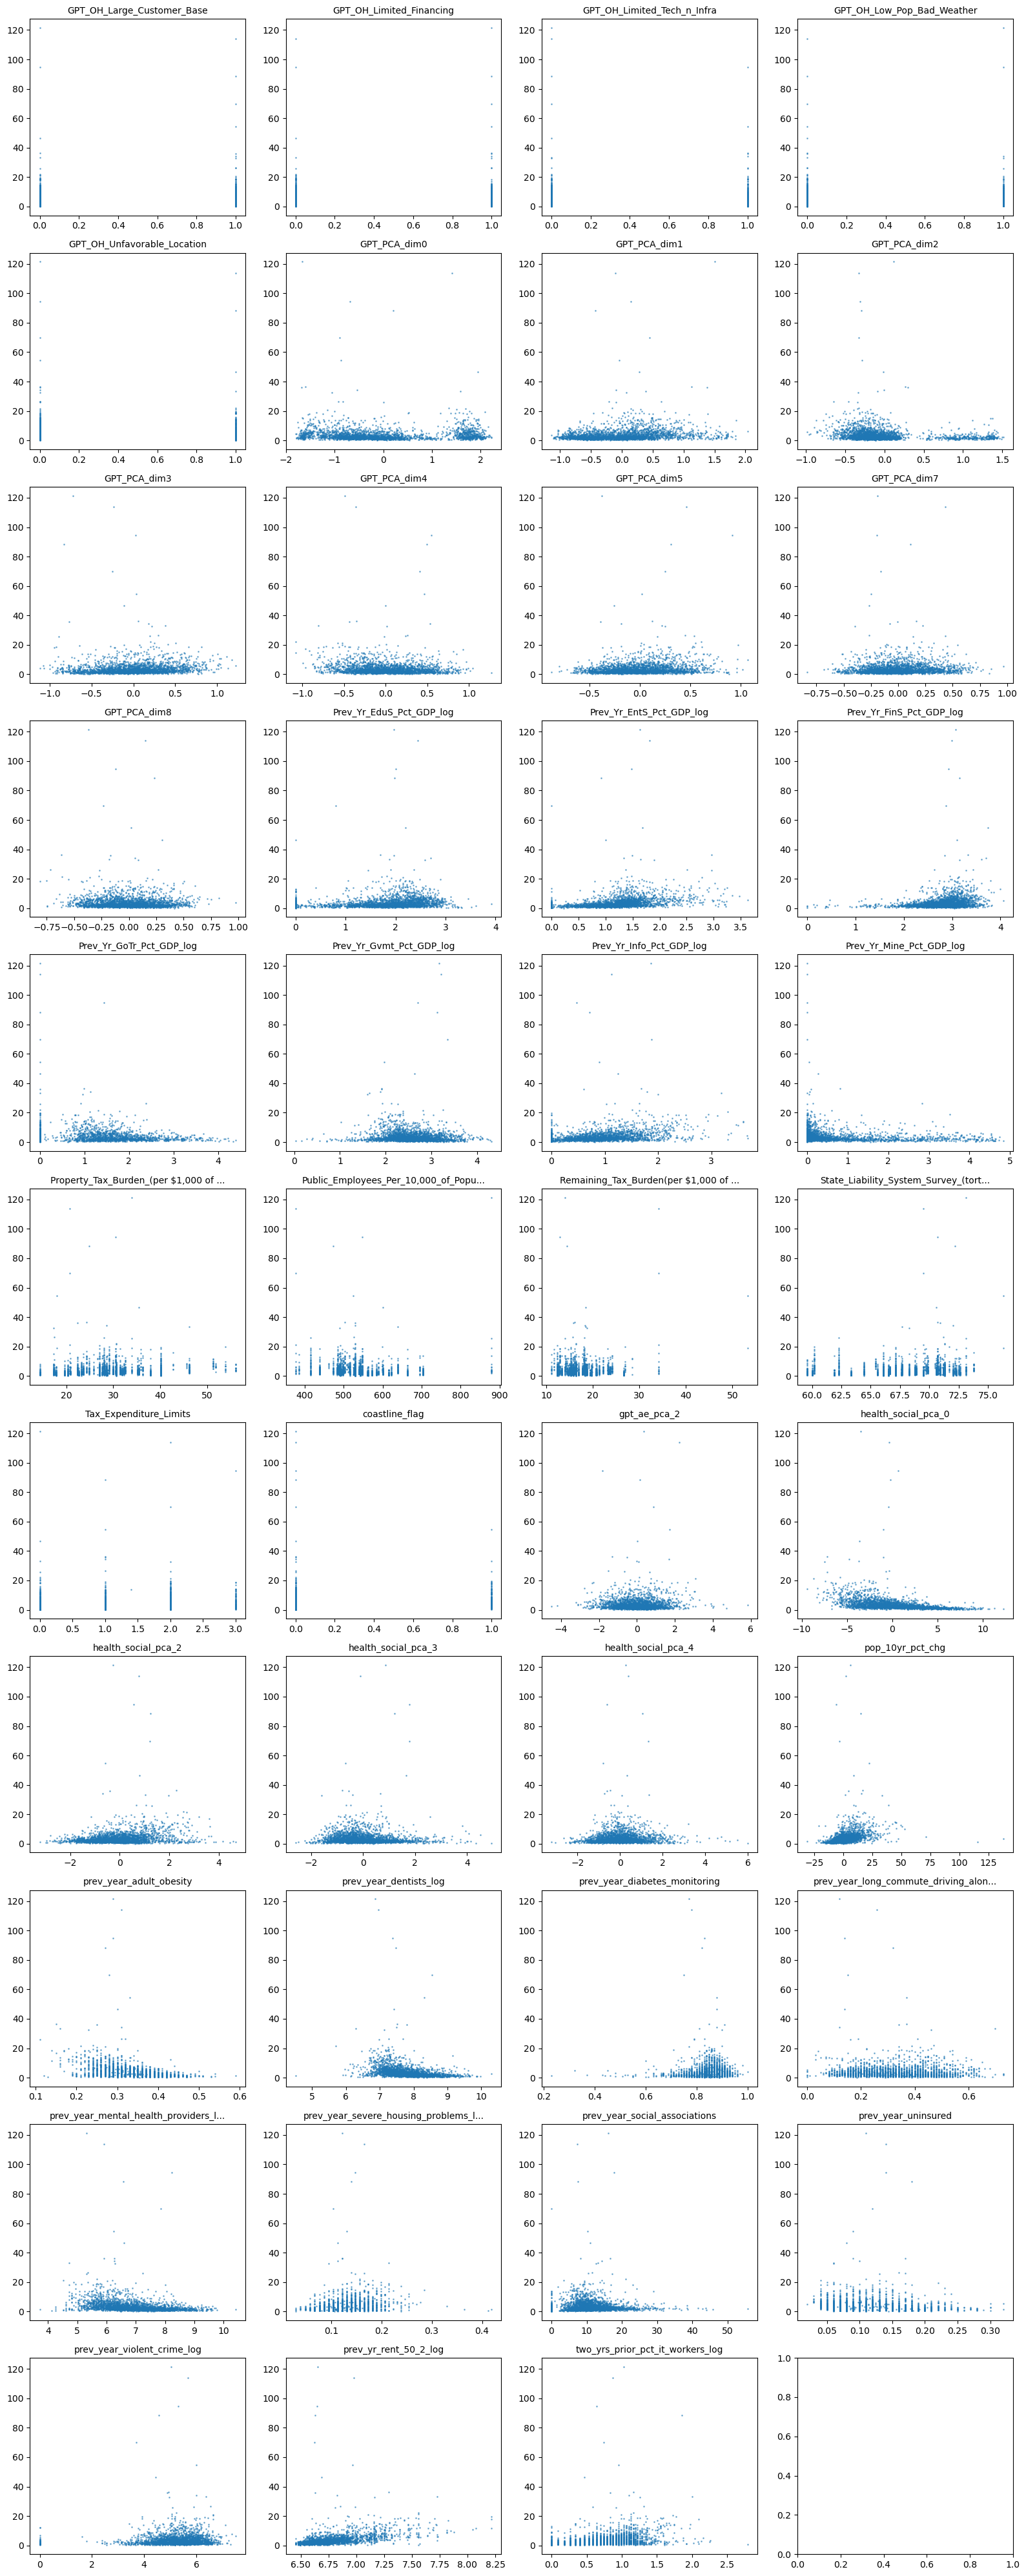

In [7]:
i = 0
fig, axes = plt.subplots(11, 4, figsize=(16, 40))
for col in logit_result_sorted:
    if col != 'microbusiness_density':
        # plot the scatter plot
        axes[i//4, i%4].scatter(df[col], df['microbusiness_density'], s=1, alpha=0.5)
        col_name = col[:35] + '...' if len(col) > 35 else col
        axes[i//4, i%4].set_title(col_name, fontsize=10)
        i += 1
plt.tight_layout()
plt.show()